In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv('../data/thyroidDF.csv')

In [3]:
print(data)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0           f               f    

In [4]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


<Axes: xlabel='age'>

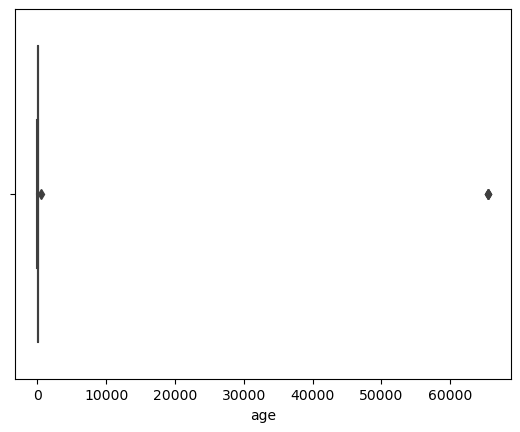

In [5]:

sns.boxplot(x=data['age'])

In [43]:
print(data.isna().sum())

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64


In [44]:
data = data[data['age']<=100]
data = data[data['age']>0]

In [45]:
data.drop_duplicates('patient_id')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [46]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
data_numerical = data[numerical_cols]

imputer = KNNImputer()
data_imputed_numerical = pd.DataFrame(imputer.fit_transform(data_numerical), columns = data_numerical.columns)

data[numerical_cols] = data_imputed_numerical

In [47]:
data.dropna()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29.0,F,f,f,f,f,f,f,f,t,...,107.2,f,1.026,f,85.6,f,24.0,other,-,840801013.0
1,29.0,F,f,f,f,f,f,f,f,f,...,128.0,f,0.996,f,97.4,f,24.0,other,-,840801014.0
2,41.0,F,f,f,f,f,f,f,f,f,...,107.2,f,0.988,f,83.4,t,11.0,other,-,840801042.0
3,36.0,F,f,f,f,f,f,f,f,f,...,107.2,f,0.988,f,83.4,t,26.0,other,-,840803046.0
4,32.0,F,f,f,f,f,f,f,f,f,...,107.2,f,0.988,f,83.4,t,36.0,other,S,840803047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,56.0,F,t,f,f,f,f,f,f,f,...,64.0,t,0.830,t,77.0,f,28.4,SVI,-,870119022.0
9164,22.0,F,f,f,f,f,f,f,f,f,...,91.0,t,0.920,t,99.0,f,28.4,other,-,870119023.0
9165,69.0,F,f,f,f,f,f,f,f,f,...,113.0,t,1.270,t,89.0,f,28.4,other,-,870119025.0
9166,47.0,F,f,f,f,f,f,f,f,f,...,75.0,t,0.850,t,88.0,f,28.4,SVI,-,870119027.0


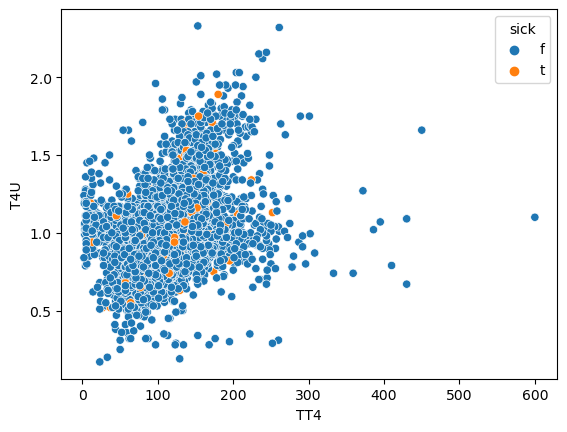

In [51]:
sns.scatterplot(x='TT4', y='T4U', data=data, hue='sick')
plt.show()

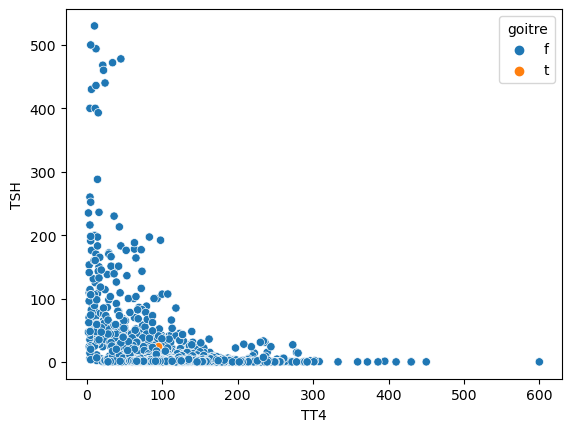

In [33]:
sns.scatterplot(x='TT4', y='TSH', data=data, hue='goitre')
plt.show()

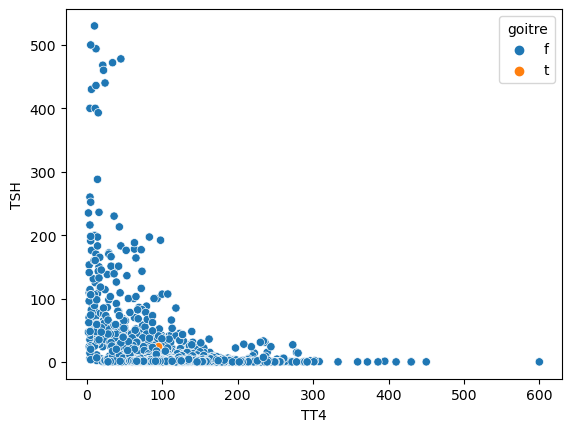

In [34]:
sns.scatterplot(x='TT4', y='TSH', data=data, hue='goitre')
plt.show()

<Axes: xlabel='sick', ylabel='Count'>

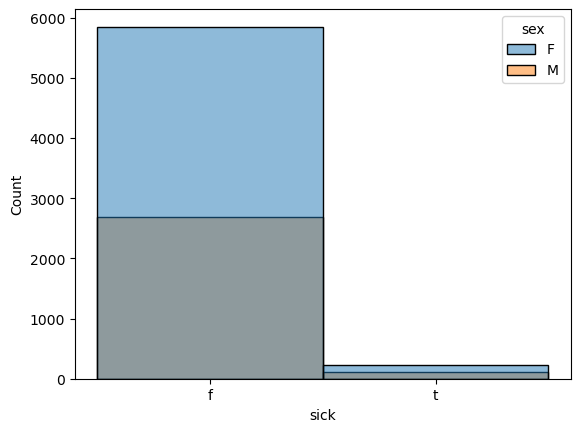

In [6]:
sns.histplot(data=data, x='sick', hue='sex')

<Axes: xlabel='tumor', ylabel='Count'>

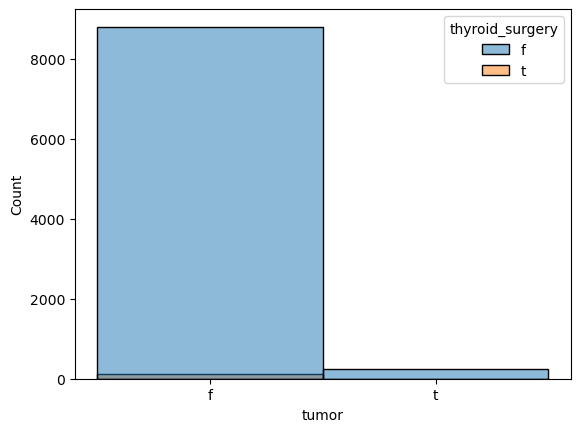

In [13]:
sns.histplot(data=data, x='tumor', hue='thyroid_surgery')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")
data["age"] = imputer.fit_transform(data[["age"]])

# Scale the data using standardization
scaler = StandardScaler()
data["age_scaled"] = scaler.fit_transform(data[["age"]])

print(data[["age", "age_scaled"]].head())

    age  age_scaled
0  29.0   -0.037634
1  29.0   -0.037634
2  41.0   -0.027499
3  36.0   -0.031722
4  32.0   -0.035100


In [21]:
print(data.dtypes)

age                    float64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
age_scaled             float64
dtype: o

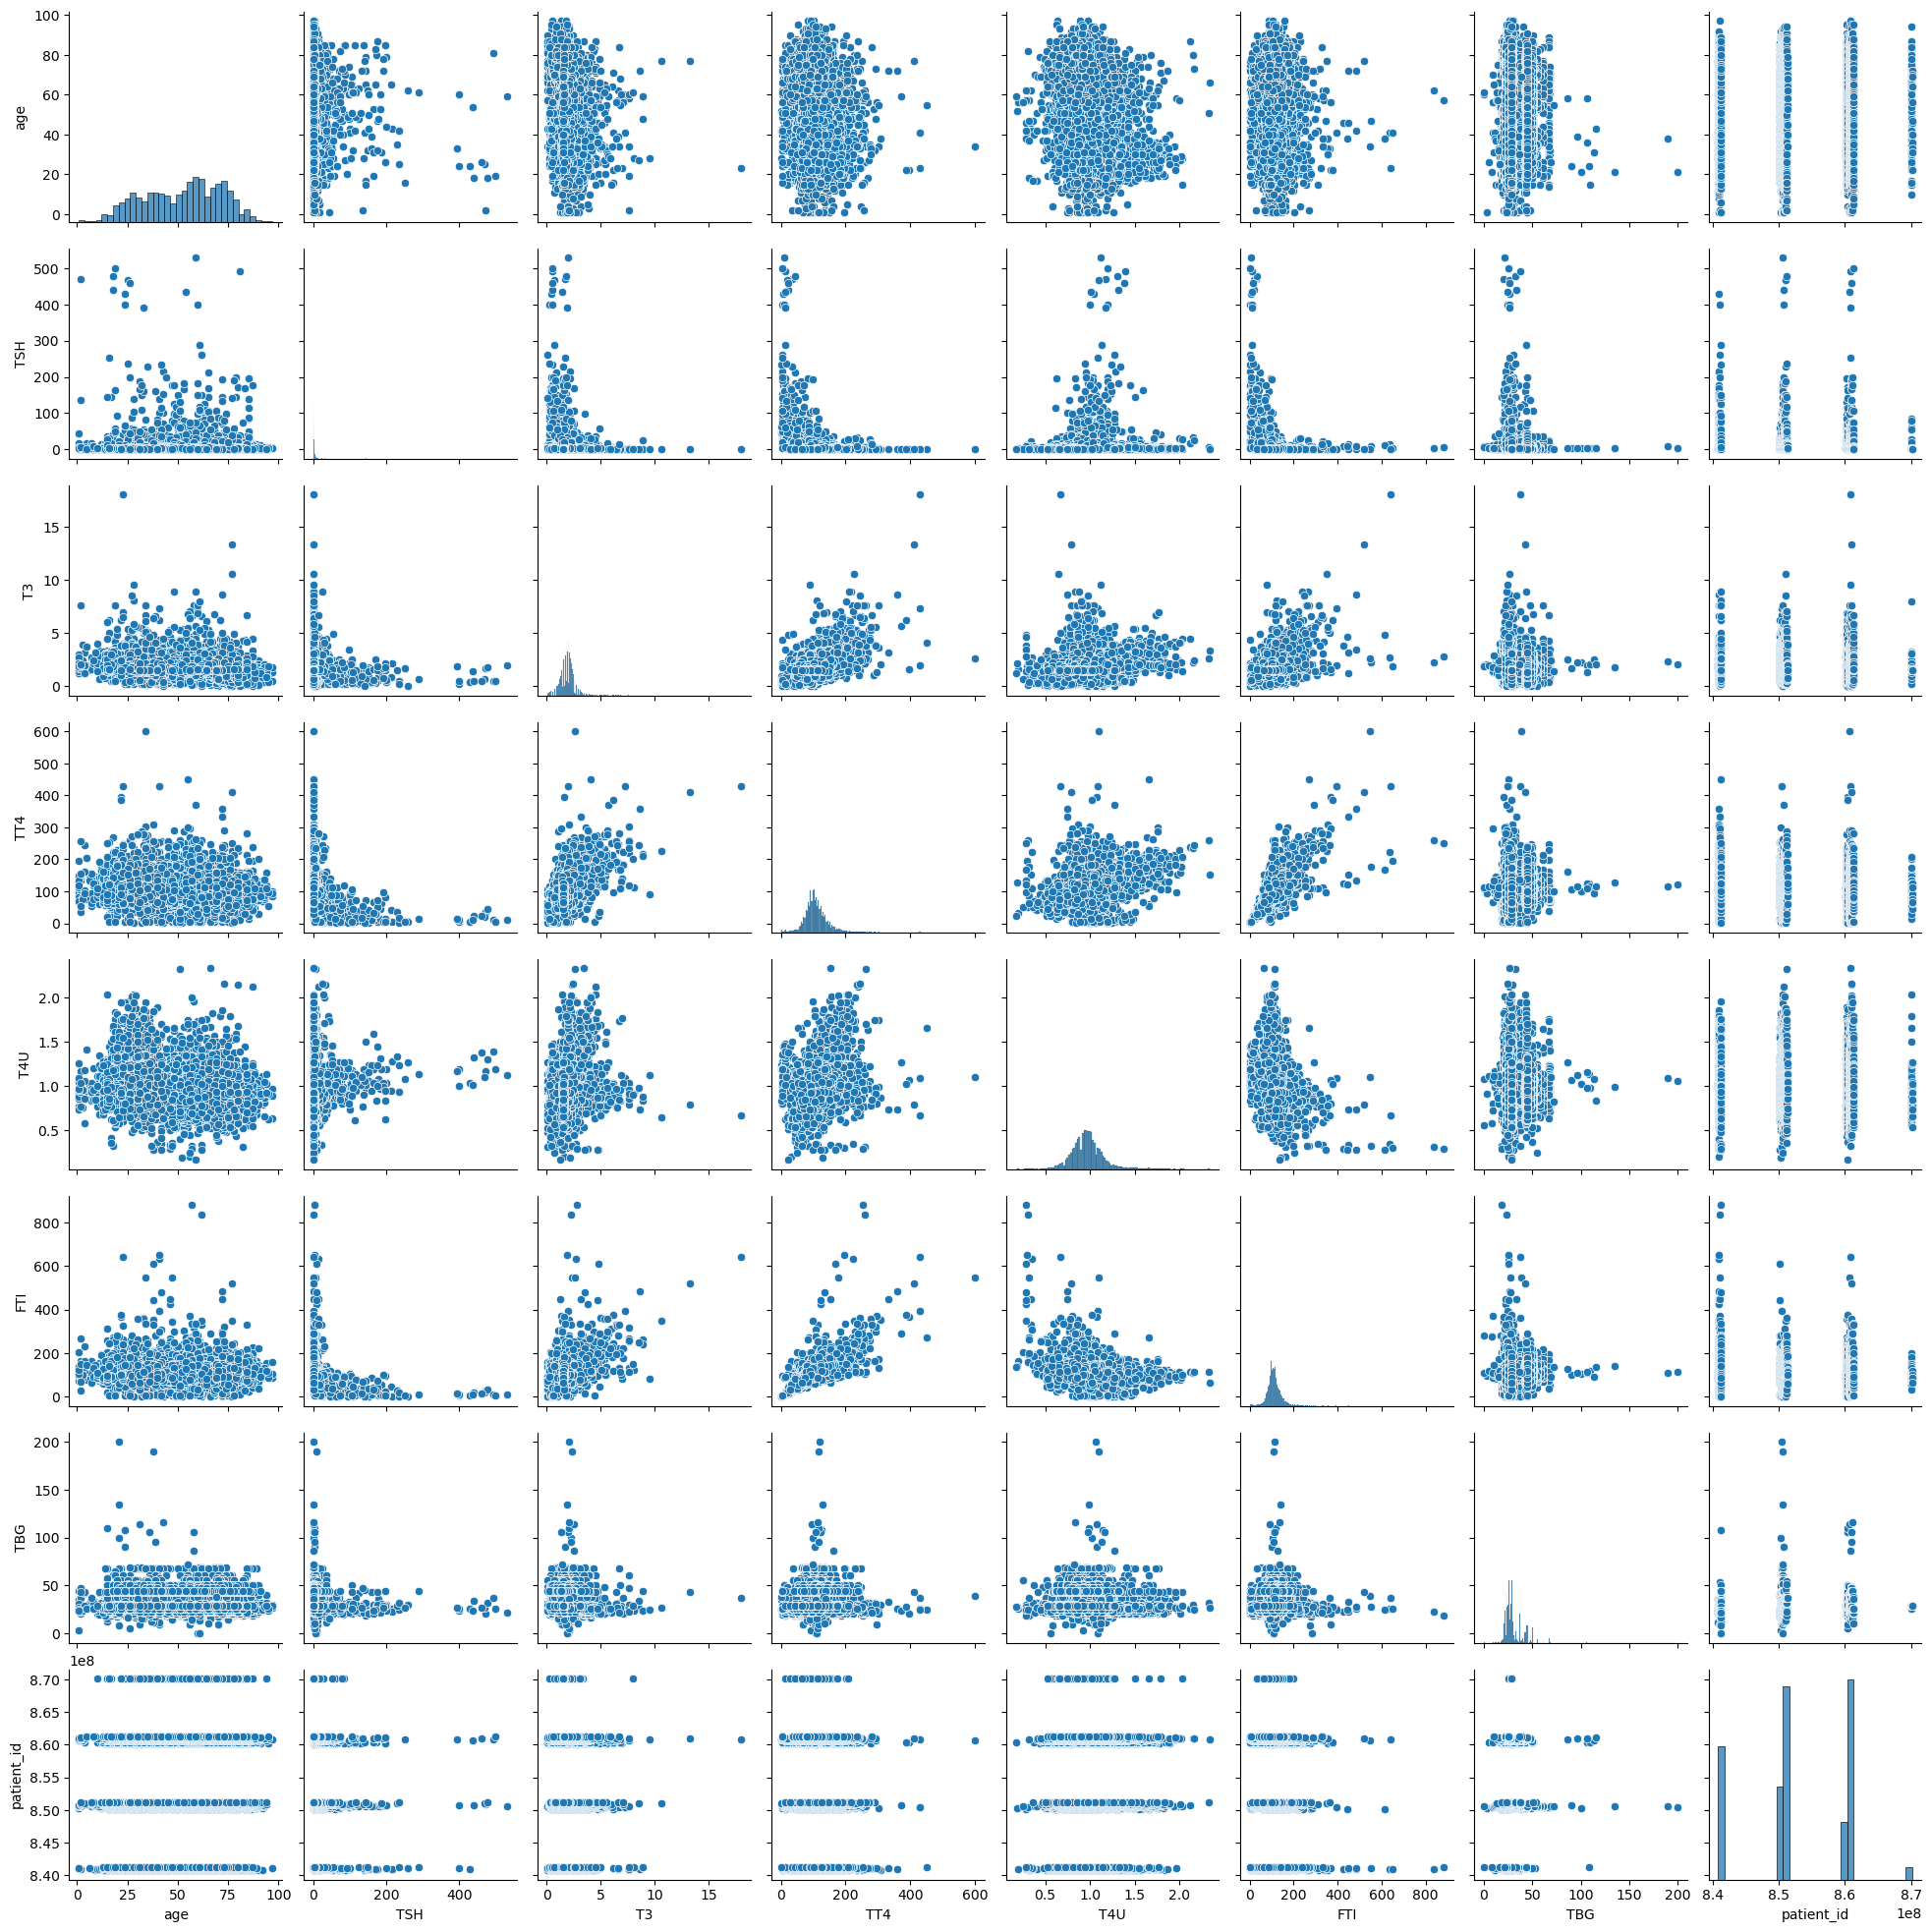

In [48]:
vars = data.dtypes[data.dtypes == "float64"].index.tolist()
pplot = sns.pairplot(data=data,x_vars=vars, y_vars=vars,)

In [49]:
print(data.corr())

                 age       TSH        T3       TT4       T4U       FTI  \
age         1.000000 -0.019102 -0.209550 -0.062332 -0.155722  0.020267   
TSH        -0.019102  1.000000 -0.140644 -0.269212  0.071966 -0.261458   
T3         -0.209550 -0.140644  1.000000  0.488269  0.291912  0.321937   
TT4        -0.062332 -0.269212  0.488269  1.000000  0.367244  0.741894   
T4U        -0.155722  0.071966  0.291912  0.367244  1.000000 -0.240119   
FTI         0.020267 -0.261458  0.321937  0.741894 -0.240119  1.000000   
TBG        -0.011965 -0.021946 -0.005480  0.040860  0.007116  0.025095   
patient_id  0.025160 -0.005287  0.018058  0.025390 -0.035165  0.025112   

                 TBG  patient_id  
age        -0.011965    0.025160  
TSH        -0.021946   -0.005287  
T3         -0.005480    0.018058  
TT4         0.040860    0.025390  
T4U         0.007116   -0.035165  
FTI         0.025095    0.025112  
TBG         1.000000    0.171550  
patient_id  0.171550    1.000000  


C:\Users\serei\AppData\Local\Temp\ipykernel_2036\3359323643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


In [60]:
data.dropna(inplace = True)

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


# extract the predictor variables and the target variable
X = df.drop(['target', 'patient_id'], axis=1)
y = df['target']

# encode categorical variables
# get a list of columns where the data type is object
object_cols = list(X.select_dtypes(include=['object']).columns)
# perform one-hot encoding on categorical variables
X = pd.get_dummies(X, columns=object_cols)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the SVM model
model = SVC()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average ='weighted')
recall = recall_score(y_test, y_pred, average ='weighted')
f1 = f1_score(y_test, y_pred, average ='weighted')

print("Performance of the logistic regression model:")
print("Accuracy: {:.3f}; Precision: {:.3f}; Recall: {:.3f}; F1 score: {:.3f}".format(accuracy, precision, recall, f1))

Performance of the logistic regression model:
Accuracy: 0.745; Precision: 0.556; Recall: 0.745; F1 score: 0.637


C:\Users\serei\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
